# Assignment: Trees
Do three questions.

**Q1.** Please answer the following questions in your own words.

1. How are trees constructed?

2. How do trees handle non-linear relationships between variables? Compare this to linear models.

3. Why is the Gini a good loss function for categorical target variables?

4. Why do trees tend to overfit, and how can this tendency be constrained?

5. True or false, and explain: Trees only really perform well in situations with lots of categorical variables as features/covariates.

6. Why don't most versions of classification/regression tree concept allow for more than two branches after a split?

7. What are some heuristic ways you can examine a tree and decide whether it is probably over- or under-fitting?

# Q1

1. A decision tree is constructed with a set of decision nodes that represent decision points, a set of edges which represent the choices madeat each decision node (made with data-driven decisions), and a set of terminal nodes (or outcomes) at the bottom of the decision tree that represent the predictions.

2. Trees are highly non-linear predictors and are good at classifications and identifying what attributes are associated with what group. Linear regression uses characteristics as weights to make a continuous prediction, but is not able to perform classifications as well. in linear regression, we use one-hot encoding to handle the categorical data to build the model, and in decision trees the characteristics of the variables are used to makde predictions about classifications rather than predicting one outcome. Trees directly use categorical variables and do not need one-hot encoding techniques.

3. The Gini is a good loss function for catergorical target variables because it provides a good measure of randomness within the target variable in the each node. A lower Gini index indicates a more "pure" node, menaing it contains a higher proportion of a single class and a higher Gini index indicates more variation and more classes within a node. The Gini index helps with the splitting at each node, helping to create an output as homogeneous as possible.

4. Decision trees a very prone to overfitting because of the nature of the model. To combat this we can use pruning techniques and adjust hyperparameters to make the model more general and prevenet overfitting.

5. False, trees can also use numerical variables to make decisions on classifications; they can use both categirical and numerical data to make decisions.

6. Becuase the trees are created with the nodes havinhg a condition and the output being "true" or "false". More outputs wouldn't provide as clear of a classification and the condition wouldn't be constrained by a true or false condition.

7. To examine a tree and determine whether it is pver or under-fitting, we can look at the performance on the training and test sets. Overfitting occurs when the model performs better on the training set and significantly worse on the test set.

**Q2.** This is a case study on regression and classification trees.

1. Load `./data/cars_hw.csv`. How many observations and features/covariates/variables? What are the available variables? Take a look at the first few rows of data.

2. For the categorical variables `Make`, `Color`, `Body_type`, `No_of_Owners`, `Fuel_Type`, `Transmission`, and `Transmission_Type`, create dummy/one-hot-encoded representations. For numeric variables, we'll use `Mileage_Run`, `Make_Year`, and `Seating_Capacity`. Our target variable will be `Price`. Make a train-test split of your data.

3. From `sklearn.tree`, import the `DecisionTreeRegressor` and `plot_tree`. Use a train-test split to iterate over possible values for `min_samples_leaf`, computing the $R^2$ for each value between 1 and 25. What choice achieves the highest $R^2$ on the test data?

4. For the optimal `min_samples_leaf` from 3, regress price on the rest of the features/covariates using the training data. What is your $R^2$ and RMSE on the test set? Plot the dendrogram. Plot the residuals. Is the density of residuals symmetric and centered around 0?

4. Run a linear regression of price on the same variables. Which model -- regression tree or linear regression -- performs better on the test set? Why?

5. Predict prices using both your tree and your linear model, and make a scatter plot of their values. Describe what you see.

# 2

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import plot_tree

In [ ]:
#1

In [11]:
df = pd.read_csv("cars_hw.csv")

In [12]:
df.head() # looking at variables

,Unnamed: 0,Make,Make_Year,Color,Body_Type,Mileage_Run,No_of_Owners,Seating_Capacity,Fuel_Type,Transmission,Transmission_Type,Price
0,1,Volkswagen,2017,silver,sedan,44611,1st,5,diesel,7-Speed,Automatic,657000
1,2,Hyundai,2016,red,crossover,20305,1st,5,petrol,5-Speed,Manual,682000
2,3,Honda,2019,white,suv,29540,2nd,5,petrol,5-Speed,Manual,793000
3,4,Renault,2017,bronze,hatchback,35680,1st,5,petrol,5-Speed,Manual,414000
4,5,Hyundai,2017,orange,hatchback,25126,1st,5,petrol,5-Speed,Manual,515000


In [15]:
len(df) # observations

976

In [ ]:
#2

In [18]:
categorical_cols = ['Make', 'Color', 'Body_Type', 'No_of_Owners', 'Fuel_Type', 'Transmission', 'Transmission_Type']
df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

X = df_encoded.drop('Price', axis=1)
y = df_encoded['Price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
#3

In [20]:
r2_scores = []
for i in range(1, 26):
    regressor = DecisionTreeRegressor(min_samples_leaf=i, random_state=42)
    regressor.fit(X_train, y_train)
    r2 = regressor.score(X_test, y_test)
    r2_scores.append(r2)

best_min_samples_leaf = np.argmax(r2_scores) + 1
print(f"Optimal min_samples_leaf: {best_min_samples_leaf}")

Optimal min_samples_leaf: 8


In [ ]:
#4

R-squared on test set: 0.8213135837522154
RMSE on test set: 143159.08892903704


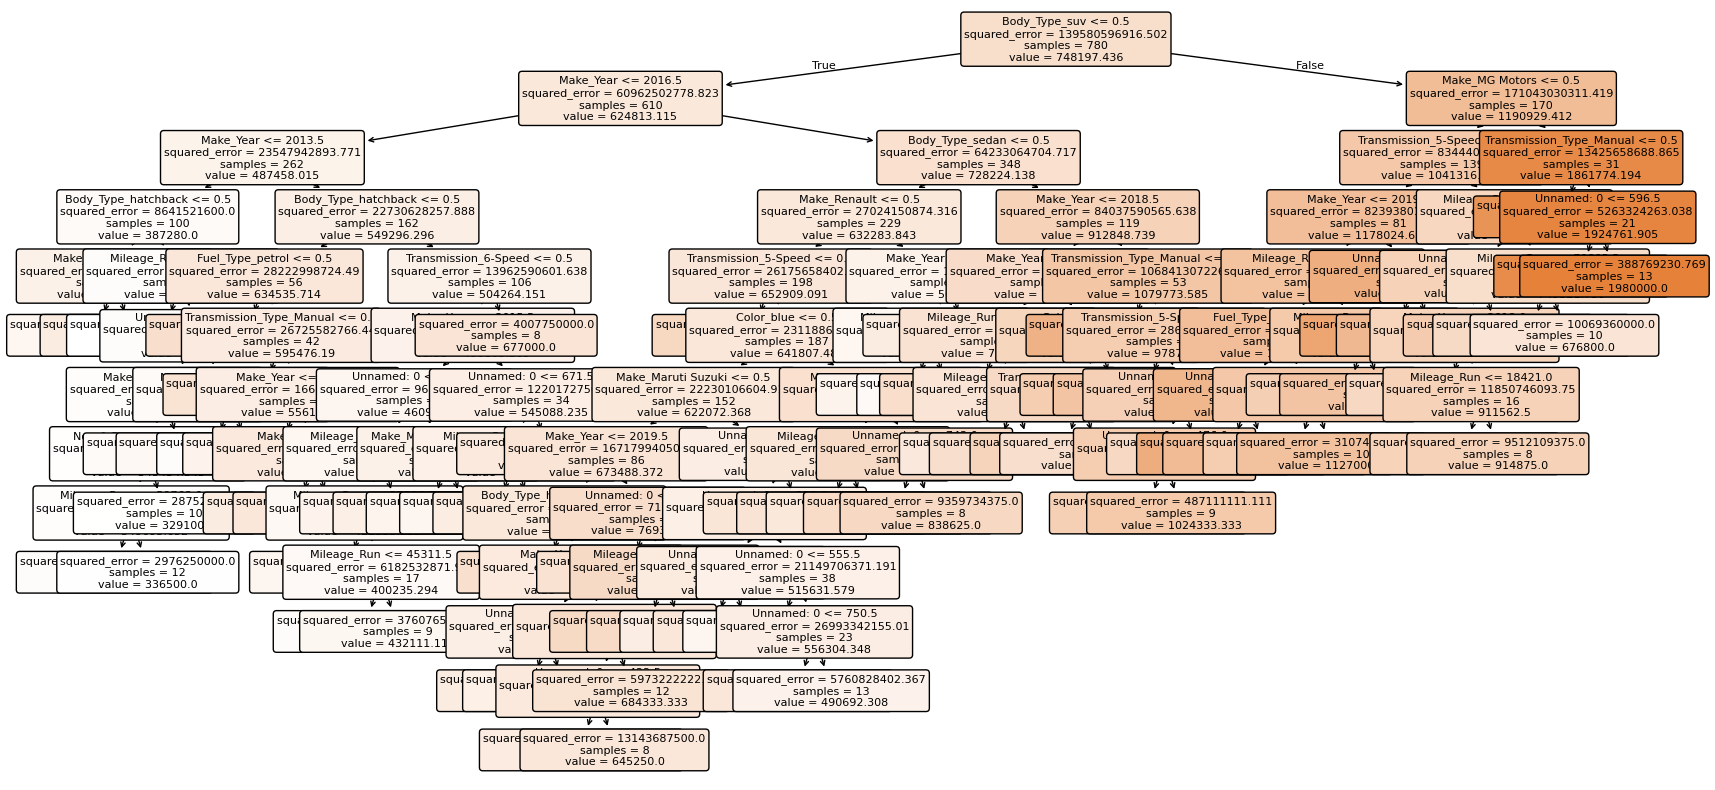

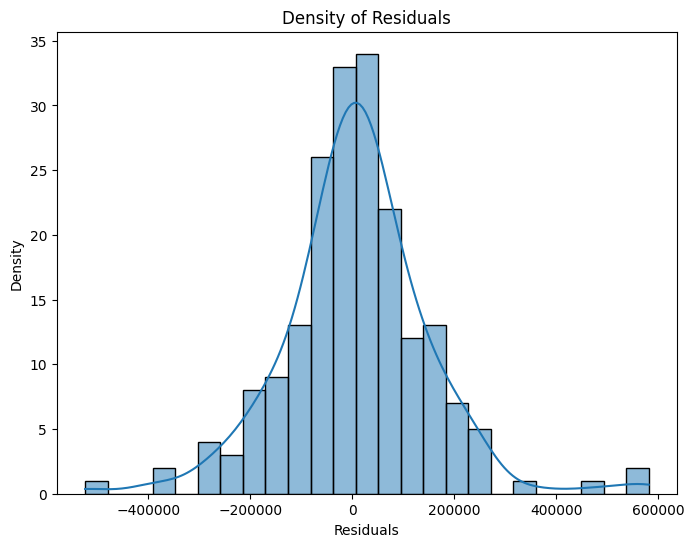

Mean of residuals: 8443.816132846745


In [23]:
from sklearn.metrics import mean_squared_error
import seaborn as sns
optimal_min_samples_leaf = 8

regressor = DecisionTreeRegressor(min_samples_leaf=optimal_min_samples_leaf, random_state=42)
regressor.fit(X_train, y_train)

y_pred = regressor.predict(X_test)
r2 = regressor.score(X_test, y_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f"R-squared on test set: {r2}")
print(f"RMSE on test set: {rmse}")

plt.figure(figsize=(20,10))
plot_tree(regressor, feature_names=X.columns, filled=True, rounded=True, fontsize=8)
plt.show()

residuals = y_test - y_pred
plt.figure(figsize=(8, 6))
sns.histplot(residuals, kde=True)
plt.title('Density of Residuals')
plt.xlabel('Residuals')
plt.ylabel('Density')
plt.show()

print("Mean of residuals:", np.mean(residuals))

In [ ]:
#5

In [24]:
from sklearn.linear_model import LinearRegression

linear_regressor = LinearRegression()
linear_regressor.fit(X_train, y_train)

y_pred_linear = linear_regressor.predict(X_test)
r2_linear = linear_regressor.score(X_test, y_test)
rmse_linear = np.sqrt(mean_squared_error(y_test, y_pred_linear))
print(f"Linear Regression R-squared on test set: {r2_linear}")
print(f"Linear Regression RMSE on test set: {rmse_linear}")

Linear Regression R-squared on test set: 0.8163910583949119
Linear Regression RMSE on test set: 145117.59426198687


In [25]:
print(f"Decision Tree R-squared: {r2}")
print(f"Decision Tree RMSE: {rmse}")
print(f"Linear Regression R-squared: {r2_linear}")
print(f"Linear Regression RMSE: {rmse_linear}")

if r2 > r2_linear:
    print("Decision Tree performs better.")
else:
    print("Linear Regression performs better.")

Decision Tree R-squared: 0.8213135837522154
Decision Tree RMSE: 143159.08892903704
Linear Regression R-squared: 0.8163910583949119
Linear Regression RMSE: 145117.59426198687
Decision Tree performs better.


In [ ]:
#6

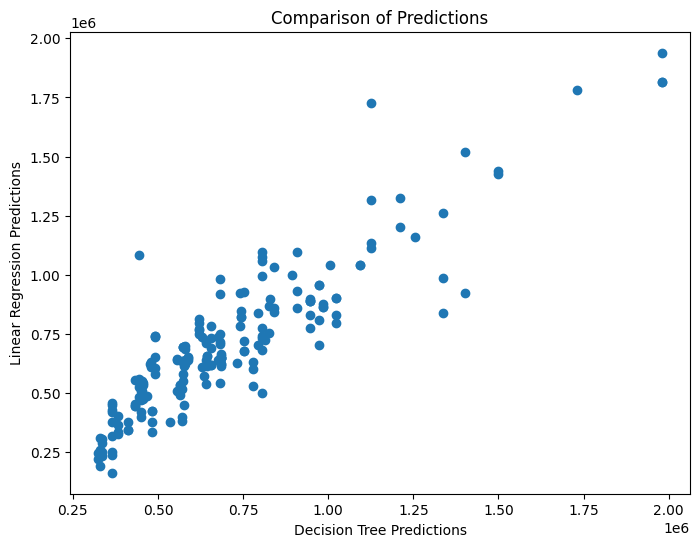

In [26]:
plt.figure(figsize=(8, 6))
plt.scatter(y_pred, y_pred_linear)
plt.xlabel("Decision Tree Predictions")
plt.ylabel("Linear Regression Predictions")
plt.title("Comparison of Predictions")
plt.show()

The models appear to be making similar predictions using the tree and linear regression predictions. There is an underlying linear relationship in the data.

**Q3.** This is a case study about classification and regression trees.

1. Load the `Breast Cancer METABRIC.csv` dataset. How many observations and variables does it contain? Print out the first few rows of data.

2.  We'll use a consistent set of feature/explanatory variables. For numeric variables, we'll include `Tumor Size`, `Lymph nodes examined positive`, `Age at Diagnosis`. For categorical variables, we'll include `Tumor Stage`, `Chemotherapy`, and `Cancer Type Detailed`. One-hot-encode the categorical variables and concatenate them with the numeric variables into a feature/covariate matrix, $X$.

3. Let's predict `Overall Survival Status` given the features/covariates $X$. There are 528 missing values, unfortunately: Either drop those rows from your data or add them as a category to predict. Constrain the minimum samples per leaf to 10. Print a dendrogram of the tree. Print a confusion matrix of the algorithm's performance. What is the accuracy?

4. For your model in part three, compute three statistics:
    - The **true positive rate** or **sensitivity**:
        $$
        TPR = \dfrac{TP}{TP+FN}
        $$
    - The **true negative rate** or **specificity**:
        $$
        TNR = \dfrac{TN}{TN+FP}
        $$
    Does your model tend to perform better with respect to one of these metrics?

5. Let's predict `Overall Survival (Months)` given the features/covariates $X$. Use the train/test split to pick the optimal `min_samples_leaf` value that gives the highest $R^2$ on the test set (it's about 110). What is the $R^2$? Plot the test values against the predicted values. How do you feel about this model for clinical purposes?

**Q4.** This is a case study about trees using bond rating data. This is a dataset about bond ratings for different companies, alongside a bunch of business statistics and other data. Companies often have multiple reviews at different dates. We want to predict the bond rating (AAA, AA, A, BBB, BB, B, ..., C, D). Do business fundamentals predict the company's rating?

1. Load the `./data/corporate_ratings.csv` dataset. How many observations and variables does it contain? Print out the first few rows of data.

2.  Plot a histogram of the `ratings` variable. It turns out that the gradations of AAA/AA/A and BBB/BB/B and so on make it hard to get good results with trees. Collapse all AAA/AA/A ratings into just A, and similarly for B and C.

3. Use all of the variables **except** Rating, Date, Name, Symbol, and Rating Agency Name. To include Sector, make a dummy/one-hot-encoded representation and include it in your features/covariates. Collect the relevant variables into a data matrix $X$.

4. Do a train/test split of the data and use a decision tree classifier to predict the bond rating. Including a min_samples_leaf constraint can raise the accuracy and speed up computation time. Print a confusion matrix and the accuracy of your model. How well do you predict the different bond ratings?

5. If you include the rating agency as a feature/covariate/predictor variable, do the results change? How do you interpret this?

In [ ]:
#1

In [28]:
df = pd.read_csv("corporate_ratings.csv")

In [29]:
df.head() # observing variables

,Rating,Name,Symbol,Rating Agency Name,Date,Sector,currentRatio,quickRatio,cashRatio,daysOfSalesOutstanding,...,effectiveTaxRate,freeCashFlowOperatingCashFlowRatio,freeCashFlowPerShare,cashPerShare,companyEquityMultiplier,ebitPerRevenue,enterpriseValueMultiple,operatingCashFlowPerShare,operatingCashFlowSalesRatio,payablesTurnover
0,A,Whirlpool Corporation,WHR,Egan-Jones Ratings Company,11/27/2015,Consumer Durables,0.945894,0.426395,0.099690,44.203245,...,0.202716,0.437551,6.810673,9.809403,4.008012,0.049351,7.057088,15.565438,0.058638,3.906655
1,BBB,Whirlpool Corporation,WHR,Egan-Jones Ratings Company,2/13/2014,Consumer Durables,1.033559,0.498234,0.203120,38.991156,...,0.074155,0.541997,8.625473,17.402270,3.156783,0.048857,6.460618,15.914250,0.067239,4.002846
2,BBB,Whirlpool Corporation,WHR,Fitch Ratings,3/6/2015,Consumer Durables,0.963703,0.451505,0.122099,50.841385,...,0.214529,0.513185,9.693487,13.103448,4.094575,0.044334,10.491970,18.888889,0.074426,3.483510
3,BBB,Whirlpool Corporation,WHR,Fitch Ratings,6/15/2012,Consumer Durables,1.019851,0.510402,0.176116,41.161738,...,1.816667,-0.147170,-1.015625,14.440104,3.630950,-0.012858,4.080741,6.901042,0.028394,4.581150
4,BBB,Whirlpool Corporation,WHR,Standard & Poor's Ratings Services,10/24/2016,Consumer Durables,0.957844,0.495432,0.141608,47.761126,...,0.166966,0.451372,7.135348,14.257556,4.012780,0.053770,8.293505,15.808147,0.058065,3.857790


In [30]:
len(df) # num of observations

2029

In [ ]:
#2

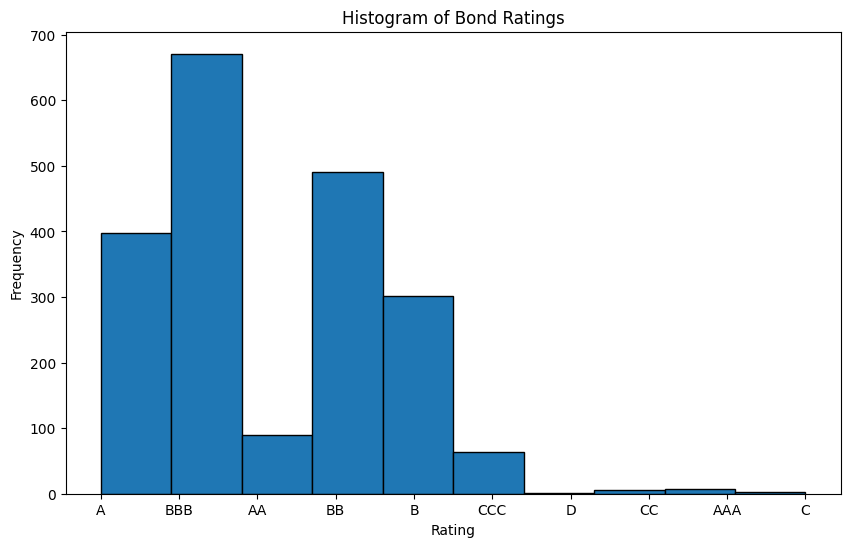

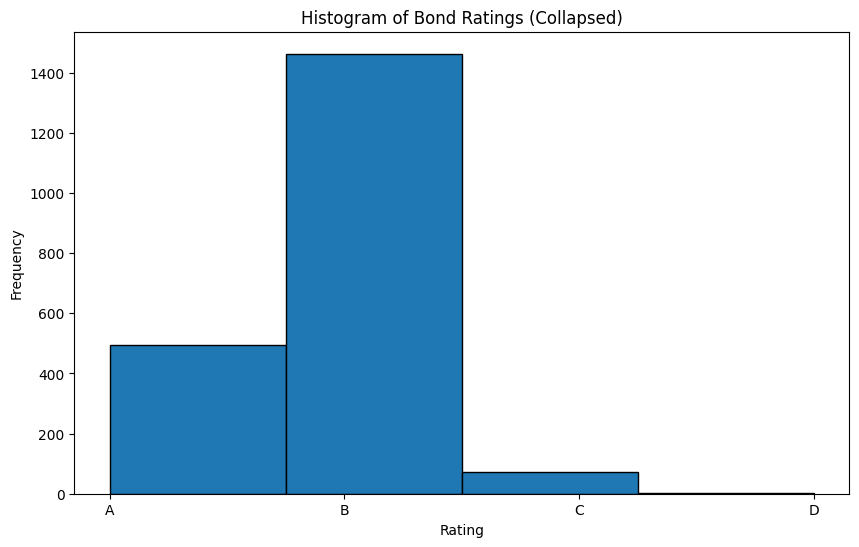

In [31]:
plt.figure(figsize=(10, 6))
plt.hist(df['Rating'], bins=len(df['Rating'].unique()), edgecolor='black')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.title('Histogram of Bond Ratings')
plt.show()

rating_mapping = {
    'AAA': 'A', 'AA': 'A', 'A': 'A',
    'BBB': 'B', 'BB': 'B', 'B': 'B',
    'CCC': 'C', 'CC': 'C', 'C': 'C',
    'D': 'D'
}
df['Rating'] = df['Rating'].replace(rating_mapping)

plt.figure(figsize=(10, 6))
plt.hist(df['Rating'], bins=len(df['Rating'].unique()), edgecolor='black')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.title('Histogram of Bond Ratings (Collapsed)')
plt.show()

In [ ]:
#3

In [33]:
X = df.drop(['Rating', 'Date', 'Name', 'Symbol', 'Rating Agency Name'], axis=1)
X = pd.get_dummies(X, columns=['Sector'], drop_first=True)

X.head()

,currentRatio,quickRatio,cashRatio,daysOfSalesOutstanding,netProfitMargin,pretaxProfitMargin,grossProfitMargin,operatingProfitMargin,returnOnAssets,returnOnCapitalEmployed,...,Sector_Consumer Durables,Sector_Consumer Non-Durables,Sector_Consumer Services,Sector_Energy,Sector_Finance,Sector_Health Care,Sector_Miscellaneous,Sector_Public Utilities,Sector_Technology,Sector_Transportation
0,0.945894,0.426395,0.099690,44.203245,0.037480,0.049351,0.176631,0.061510,0.041189,0.091514,...,True,False,False,False,False,False,False,False,False,False
1,1.033559,0.498234,0.203120,38.991156,0.044062,0.048857,0.175715,0.066546,0.053204,0.104800,...,True,False,False,False,False,False,False,False,False,False
2,0.963703,0.451505,0.122099,50.841385,0.032709,0.044334,0.170843,0.059783,0.032497,0.075955,...,True,False,False,False,False,False,False,False,False,False
3,1.019851,0.510402,0.176116,41.161738,0.020894,-0.012858,0.138059,0.042430,0.025690,-0.027015,...,True,False,False,False,False,False,False,False,False,False
4,0.957844,0.495432,0.141608,47.761126,0.042861,0.053770,0.177720,0.065354,0.046363,0.096945,...,True,False,False,False,False,False,False,False,False,False


In [ ]:
#4

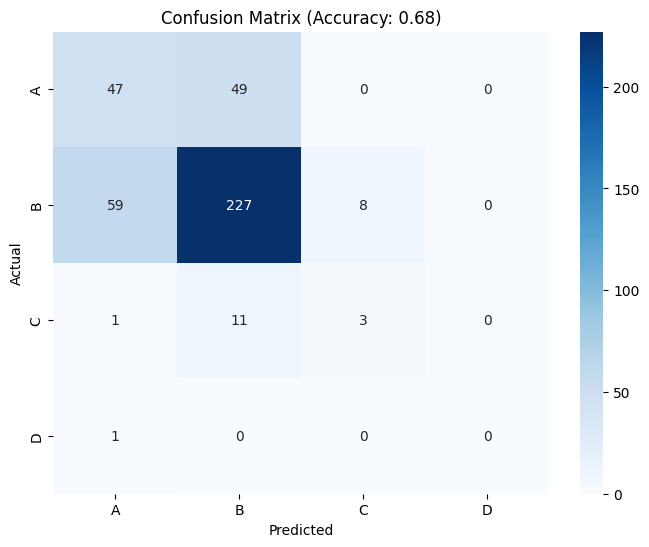

Accuracy: 0.6822660098522167


In [34]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

y = df['Rating']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

clf = DecisionTreeClassifier(min_samples_leaf=10, random_state=42) # Example value for min_samples_leaf, adjust as needed
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title(f'Confusion Matrix (Accuracy: {accuracy:.2f})')
plt.show()

print(f"Accuracy: {accuracy}")


In [ ]:
#5

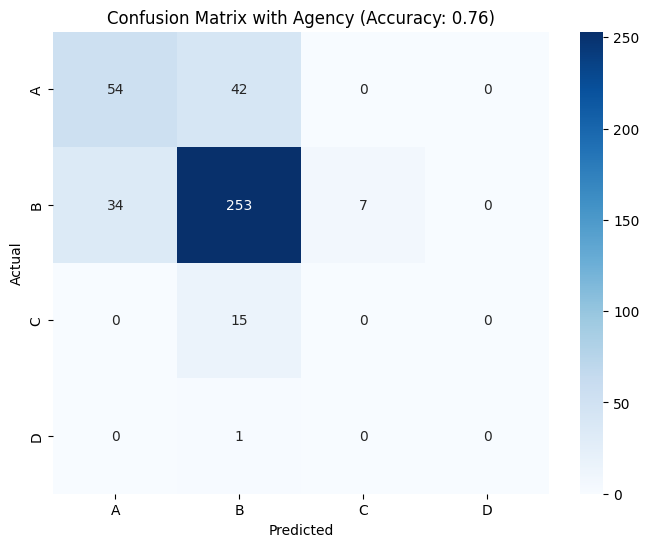

Accuracy with Rating Agency: 0.7561576354679803


In [35]:
X_with_agency = df.drop(['Rating', 'Date', 'Name', 'Symbol'], axis=1)
X_with_agency = pd.get_dummies(X_with_agency, columns=['Sector', 'Rating Agency Name'], drop_first=True)

X_train_agency, X_test_agency, y_train_agency, y_test_agency = train_test_split(X_with_agency, y, test_size=0.2, random_state=42)

clf_agency = DecisionTreeClassifier(min_samples_leaf=10, random_state=42)
clf_agency.fit(X_train_agency, y_train_agency)
y_pred_agency = clf_agency.predict(X_test_agency)

cm_agency = confusion_matrix(y_test_agency, y_pred_agency)
accuracy_agency = accuracy_score(y_test_agency, y_pred_agency)

plt.figure(figsize=(8, 6))
sns.heatmap(cm_agency, annot=True, fmt="d", cmap="Blues",
            xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title(f'Confusion Matrix with Agency (Accuracy: {accuracy_agency:.2f})')
plt.show()

print(f"Accuracy with Rating Agency: {accuracy_agency}")

Including the rating agency as a feature improved the model's accuracy. This suggests that the rating agency's assessment is predictive of the final bond rating, and adding this information helps the model.

**Q5.** This is a case study about detecting fraud using classification trees. The goal is to predict the `class` variable, which is 0 for non-fraud and 1 for fraud.

1. Open `./data/creditcard_fraud.csv`. Print the number of observations and variables, and look at the first few rows of data. The variables are already normalized and de-identified, and are just called things like `V8` to protect the privacy of the clients.

2. Print a table of counts for the `class` variable and make a histogram. What percentage of transactions are fraudulent?

3. Drop `Time` and make a decision tree classifier to predict fraud. Print a confusion table and compute the accuracy. This is a serious **class imbalance** problem: The minority class is so small that essentially predicting 0's for all cases will achieve an extremely high accuracy. There are over-sampling techniques to deal with this issue, but we don't have time to cover them in class.

4. Imagine that you block every transaction in the test set labelled as fraudulent. How much money is (1) saved that should be saved, (2) lost to fraud anyway, (3) withheld in error from customers? Does implementing this anti-fraud system seem like a good idea, or not? Why?

5. Instead of predicting fraud, predict loss: Multiple the `Class` variable times the `Amount` variable, and call it `Loss`. Predict it using a decision tree regressor (making sure to drop Class, Time, and Loss from the features/covariates/predictors). What $R^2$ and RMSE do you get? Make a scatterplot of the predicted values on the test group versus the actual test values. Do you notice any interesting patterns? How could you use this algorithm to decide which transactions to block, and why?


**Q6.** Show that any decision tree is equivalent to a linear regression on a set of dummy variables that represent the optimal splits in the tree.

Hint: You can think of CART as partitioning the feature space into a set of sets $\{S_1, S_2, ..., S_K\}$, and then predicting the average for all of the observations in each set $S_k$, $m_k$:
$$
\hat{y}(x) = \sum_{k=1}^K \mathbb{I}\{ x \text{ is in } S_k \} m_k
$$
where $\mathbb{I} \{ P(x,k)\}$ takes the value 1 if the proposition $P(x,k)$ is true and 0 otherwise. Now, doesn't that look like least-squares regression on a set of dummy/one-hot-encoded variables?

Conversely, can any linear regression be represented by a tree?